# RETAIL DATA ANALYSIS

## Table Of Contents


### Introduction

### Executive Summary

### Sales Analysis

    1. Sales Trend Overtime
    2. Top Seliing Products
    3. Top Revenue Generating Products
    4. Sales By Location
    5. Revenue By Location
    6. Seasonality Analysis and Time Series Forcasting

### Customer Segmentation
    1. Clusters Creation
    2. Sales and Revenue by Clusters
    3. Top Selling Products by Clusters
    4. Top Location by Clusters

### Market Basket Analysis
    1. Frequent Itemsets
    2. Frequent Itemsets Support and Confidence Degrees
    3. Hierachical Associasion rules diagram
    

### Insights

### Recommendations

# 

### Introduction

The retail industry boasts a wealth of data, given that its core operations revolve around sales and revenue generation. Sales analysis plays a pivotal role in extracting valuable insights for the retail sector, encompassing factors such as identifying high-demand products, understanding high-traffic demographics, and tracking the evolution of sales trends over time. These insights are instrumental in driving revenue growth and establishing measurable metrics for performance evaluation.

To harness the full potential of these key drivers, it is imperative to optimize customer engagement by leveraging their purchasing patterns. A strategic approach involves categorizing customers into clusters based on their unique purchasing behaviors. This clustering enables the tailoring of products and services to align with the characteristics of each customer group.

One effective technique that has stood the test of time in this domain is market basket analysis. This method facilitates product recommendations by examining both customer clusters and their historical purchasing patterns. By leveraging market basket analysis, retailers can enhance customer experiences and drive revenue growth.

In the scope of this project, we conducted a comprehensive analysis of sales and revenue data, performed customer segmentation through clustering techniques, and applied market basket analysis to recommend products based on customer clusters.

### Executive Summary

The project, underpinned by insights gleaned from market basket analysis and customer segmentation,  retail enterprise is poised for both sustainable growth and the delivery of an enriched, personalized shopping experience that resonates with diverse customer segments. This data-driven approach positions businesses as a formidable player in the ever-evolving and competitive retail arena.
The project has modelled possibilities for
Target Marketting
Price Optimization
Product Bundling
Customer engagement initiatives
Inventory Management


##### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, Layout, HBox, VBox, Output
import plotly.express as px
from IPython.display import display, clear_output, HTML
import plotly.graph_objects as go
import plotly.io as pio
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import networkx as nx
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#Load the data to a pandas dataframe
file='online_retail_II.xlsx'
data=pd.read_excel(file)

In [4]:
#Drop any duplicate data
data.drop_duplicates(inplace=True)

In [5]:
#Display the first 10 rows of the dataframe
data.head(5)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [6]:
#Display the information of the dataframe which include shape, data types, count, number of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518596 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      518596 non-null  object        
 1   StockCode    518596 non-null  object        
 2   Description  515668 non-null  object        
 3   Quantity     518596 non-null  int64         
 4   InvoiceDate  518596 non-null  datetime64[ns]
 5   Price        518596 non-null  float64       
 6   Customer ID  410763 non-null  float64       
 7   Country      518596 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.6+ MB


In [7]:
#From the info we have missing values and wrong data type in the customer id.
#We find the total number of missing values from each column
data.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107833
Country             0
dtype: int64

In [8]:
#The customer id is a unique identifier assosciated with each customer thus it cannot be imputed,
#but before we drop the missing values we will run summary statistics and see if some values from the columns contains error
#thus, will fixing the errors fix our issue
data.describe(include='all').transpose()

count   unique                                 top    freq  \
Invoice      518596.0  28816.0                            537434.0   675.0   
StockCode      518596     4632                              85123A    3470   
Description    515668     4681  WHITE HANGING HEART T-LIGHT HOLDER    3503   
Quantity     518596.0      NaN                                 NaN     NaN   
InvoiceDate    518596    25296                 2010-12-06 16:57:00     675   
Price        518596.0      NaN                                 NaN     NaN   
Customer ID  410763.0      NaN                                 NaN     NaN   
Country        518596       40                      United Kingdom  479047   

                          first                last          mean  \
Invoice                     NaT                 NaT           NaN   
StockCode                   NaT                 NaT           NaN   
Description                 NaT                 NaT           NaN   
Quantity                    NaT                 NaT     10.438152   
InvoiceDate 2009-12-01 07:45:00 2010-12-09 20:01:00           NaN   
Price                       NaT                 NaT      4.716176   
Customer ID                 NaT                 NaT  15353.621857   
Country                     NaT                 NaT           NaN   

                     std       min      25%      50%      75%       max  
Invoice              NaN       NaN      NaN      NaN      NaN       NaN  
StockCode            NaN       NaN      NaN      NaN      NaN       NaN  
Description          NaN       NaN      NaN      NaN      NaN       NaN  
Quantity      108.126593   -9600.0      1.0      3.0     10.0   19152.0  
InvoiceDate          NaN       NaN      NaN      NaN      NaN       NaN  
Price          147.09046 -53594.36     1.25      2.1     4.21  25111.09  
Customer ID  1681.657665   12346.0  13979.0  15311.0  16797.0   18287.0  
Country              NaN       NaN      NaN      NaN      NaN       NaN

In [9]:
#We can see this columns have no customer id, so we drop tthe rows with negative price and quantity and check for missing values and run summary statistics again
data=data[data['Price']>0]
data=data[data['Quantity']>0]
data=data[data['Description']!='Manual']

In [10]:
data.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    103680
Country             0
dtype: int64

In [11]:
#since all the the missing values are now just customer id which cannot be imputed we drop all missing values
data.dropna(inplace=True)
data.describe(include='all').transpose()

count   unique                                 top    freq  \
Invoice      400496.0  19098.0                            500356.0   251.0   
StockCode      400496     4016                              85123A    3107   
Description    400496     4443  WHITE HANGING HEART T-LIGHT HOLDER    3107   
Quantity     400496.0      NaN                                 NaN     NaN   
InvoiceDate    400496    17910                 2010-03-07 15:34:00     251   
Price        400496.0      NaN                                 NaN     NaN   
Customer ID  400496.0      NaN                                 NaN     NaN   
Country        400496       37                      United Kingdom  363864   

                          first                last          mean  \
Invoice                     NaT                 NaT           NaN   
StockCode                   NaT                 NaT           NaN   
Description                 NaT                 NaT           NaN   
Quantity                    NaT                 NaT     13.775443   
InvoiceDate 2009-12-01 07:45:00 2010-12-09 20:01:00           NaN   
Price                       NaT                 NaT       3.06814   
Customer ID                 NaT                 NaT  15361.504457   
Country                     NaT                 NaT           NaN   

                     std      min      25%      50%      75%      max  
Invoice              NaN      NaN      NaN      NaN      NaN      NaN  
StockCode            NaN      NaN      NaN      NaN      NaN      NaN  
Description          NaN      NaN      NaN      NaN      NaN      NaN  
Quantity        97.68818      1.0      2.0      5.0     12.0  19152.0  
InvoiceDate          NaN      NaN      NaN      NaN      NaN      NaN  
Price           5.133672    0.001     1.25     1.95     3.75    850.0  
Customer ID  1680.627865  12346.0  13985.0  15311.0  16805.0  18287.0  
Country              NaN      NaN      NaN      NaN      NaN      NaN

In [12]:
#we have no negative numbers and no missing values
#our price column only contains unit price not the total amount. 
#we define a function to multiply the unit price by the quantity to get the amount as a new column
def calculate(data):
    data['Amount']=data['Quantity'] * data['Price']
    return data
data= calculate(data)

In [13]:
#now that we have all columnns and cleaned data we change the data types to correct format suitable for analysis
data['Customer ID']= data['Customer ID'].astype(int)
data['Customer ID']= data['Customer ID'].astype('category')
data['Price']=data['Price'].astype(float)
data['Quantity']=data['Quantity'].astype(int)
data['Invoice']= data['Invoice'].astype('category')
data['StockCode']= data['StockCode'].astype('category')
data['Amount']=data['Price'].astype(float)
data['Country']= data['Country'].astype('category')
data['Description']= data['Description'].astype('category')
data['InvoiceDate']=data['InvoiceDate'].dt.date
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [14]:
#we check the values of the categorical columns to check for inconsistency
data['Description'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    3107
REGENCY CAKESTAND 3 TIER              1695
STRAWBERRY CERAMIC TRINKET BOX        1372
ASSORTED COLOUR BIRD ORNAMENT         1355
HOME BUILDING BLOCK WORD              1192
PACK OF 72 RETRO SPOT CAKE CASES      1183
60 TEATIME FAIRY CAKE CASES           1169
REX CASH+CARRY JUMBO SHOPPER          1099
JUMBO BAG RED RETROSPOT               1075
LUNCH BAG RED SPOTTY                  1069
Name: Description, dtype: int64

In [15]:
data['Country'].value_counts().head(10)

United Kingdom    363864
EIRE                8481
Germany             7642
France              5449
Netherlands         2723
Spain               1226
Switzerland         1170
Belgium             1035
Portugal             983
Sweden               865
Name: Country, dtype: int64

In [16]:
#lets check the info and summary statistics for the last time after the preprocessing
data.describe(include='all').transpose()

count   unique                                 top    freq  \
Invoice      400496.0  19098.0                            500356.0   251.0   
StockCode      400496     4016                              85123A    3107   
Description    400496     4443  WHITE HANGING HEART T-LIGHT HOLDER    3107   
Quantity     400496.0      NaN                                 NaN     NaN   
InvoiceDate    400496      307                 2010-11-21 00:00:00    3147   
Price        400496.0      NaN                                 NaN     NaN   
Customer ID  400496.0   4298.0                             14911.0  5551.0   
Country        400496       37                      United Kingdom  363864   
Amount       400496.0      NaN                                 NaN     NaN   

                 first       last       mean       std    min   25%   50%  \
Invoice            NaT        NaT        NaN       NaN    NaN   NaN   NaN   
StockCode          NaT        NaT        NaN       NaN    NaN   NaN   NaN   
Description        NaT        NaT        NaN       NaN    NaN   NaN   NaN   
Quantity           NaT        NaT  13.775443  97.68818    1.0   2.0   5.0   
InvoiceDate 2009-12-01 2010-12-09        NaN       NaN    NaN   NaN   NaN   
Price              NaT        NaT    3.06814  5.133672  0.001  1.25  1.95   
Customer ID        NaT        NaT        NaN       NaN    NaN   NaN   NaN   
Country            NaT        NaT        NaN       NaN    NaN   NaN   NaN   
Amount             NaT        NaT    3.06814  5.133672  0.001  1.25  1.95   

              75%      max  
Invoice       NaN      NaN  
StockCode     NaN      NaN  
Description   NaN      NaN  
Quantity     12.0  19152.0  
InvoiceDate   NaN      NaN  
Price        3.75    850.0  
Customer ID   NaN      NaN  
Country       NaN      NaN  
Amount       3.75    850.0

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400496 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400496 non-null  category      
 1   StockCode    400496 non-null  category      
 2   Description  400496 non-null  category      
 3   Quantity     400496 non-null  int32         
 4   InvoiceDate  400496 non-null  datetime64[ns]
 5   Price        400496 non-null  float64       
 6   Customer ID  400496 non-null  category      
 7   Country      400496 non-null  category      
 8   Amount       400496 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(2), int32(1)
memory usage: 18.3 MB


#### PART TWO: SALES ANALYSIS

#### SALES TRENDS OVERTIME

In [18]:
#We plot the revenue genarted daily, monthly, quarterly and yearly and use the country as a filter
def update_charts(country):
    if 'Select All' in country:
        adata=data
    

    else:
        adata=data[data['Country'].isin(country)]
    sns.set(style='whitegrid')
    fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(25,15), sharex=False)
    
    revenue= adata.groupby('InvoiceDate')['Amount'].sum().reset_index()
    sns.lineplot(x='InvoiceDate', y='Amount', data=revenue, ax=axes[0,0])
    axes[0,0].set_title('Daily Revenue Trend')
    
    monthly_revenue=revenue.resample('M', on='InvoiceDate').sum()
    sns.lineplot(x='InvoiceDate', y='Amount', data=monthly_revenue, ax=axes[0,1])
    axes[0,1].set_title('Monthly Revenue Trend')
    
    
    quarterly_revenue=revenue.resample('Q', on='InvoiceDate').sum()
    sns.barplot(x=quarterly_revenue.index, y='Amount', data=quarterly_revenue, ax=axes[1,0])
    axes[1,0].set_title('Quarterly revenue')
    
    yearly_revenue=revenue.resample('Y', on='InvoiceDate').sum()
    sns.barplot(x=yearly_revenue.index, y='Amount', data=yearly_revenue, ax=axes[1,1])
    axes[1,1].set_title('Revenue')
    
    
    
    plt.tight_layout()
    plt.show()
    
countries=['Select All'] + data['Country'].unique().tolist()
@interact(country=widgets.SelectMultiple(options=countries, value=[countries[0]], descripton='Country', layout=Layout(width='300px')))
def interactive_revenue(country):
    update_charts(country)

interactive(children=(SelectMultiple(description='country', index=(0,), layout=Layout(width='300px'), options=…

In [19]:
#We plot the total sales on daily, monthly, quarterly and yearly and use the country as a filter
def update_charts(country):
    if 'Select All' in country:
        adata=data
    else:
        adata=data[data['Country'].isin(country)]
    sns.set(style='whitegrid')
    fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(25,15), sharex=False)
    
    sales= adata.groupby('InvoiceDate')['Quantity'].sum().reset_index()
    sns.lineplot(x='InvoiceDate', y='Quantity', data=sales, ax=axes[0,0])
    axes[0,0].set_title('Daily sales Trend')
    
    monthly_sales=sales.resample('M', on='InvoiceDate').sum()
    sns.lineplot(x='InvoiceDate', y='Quantity', data=monthly_sales, ax=axes[0,1])
    axes[0,1].set_title('Monthly Sales Trend')
    
    
    quarterly_sales=sales.resample('Q', on='InvoiceDate').sum()
    sns.barplot(x=quarterly_sales.index, y='Quantity', data=quarterly_sales, ax=axes[1,0])
    axes[1,0].set_title('Quarterly Sales')
    
    yearly_sales=sales.resample('Y', on='InvoiceDate').sum()
    sns.barplot(x=yearly_sales.index, y='Quantity', data=yearly_sales, ax=axes[1,1])
    axes[1,1].set_title('Annual Sales')
    
    
    
    plt.tight_layout()
    plt.show()
    
countries=['Select All'] + data['Country'].unique().tolist()
@interact(country=widgets.SelectMultiple(options=countries, value=[countries[0]], descripton='Country', layout=Layout(width='300px')))
def interactive_revenue(country):
    update_charts(country)

interactive(children=(SelectMultiple(description='country', index=(0,), layout=Layout(width='300px'), options=…

#### TOP SELLING PRODUCTS

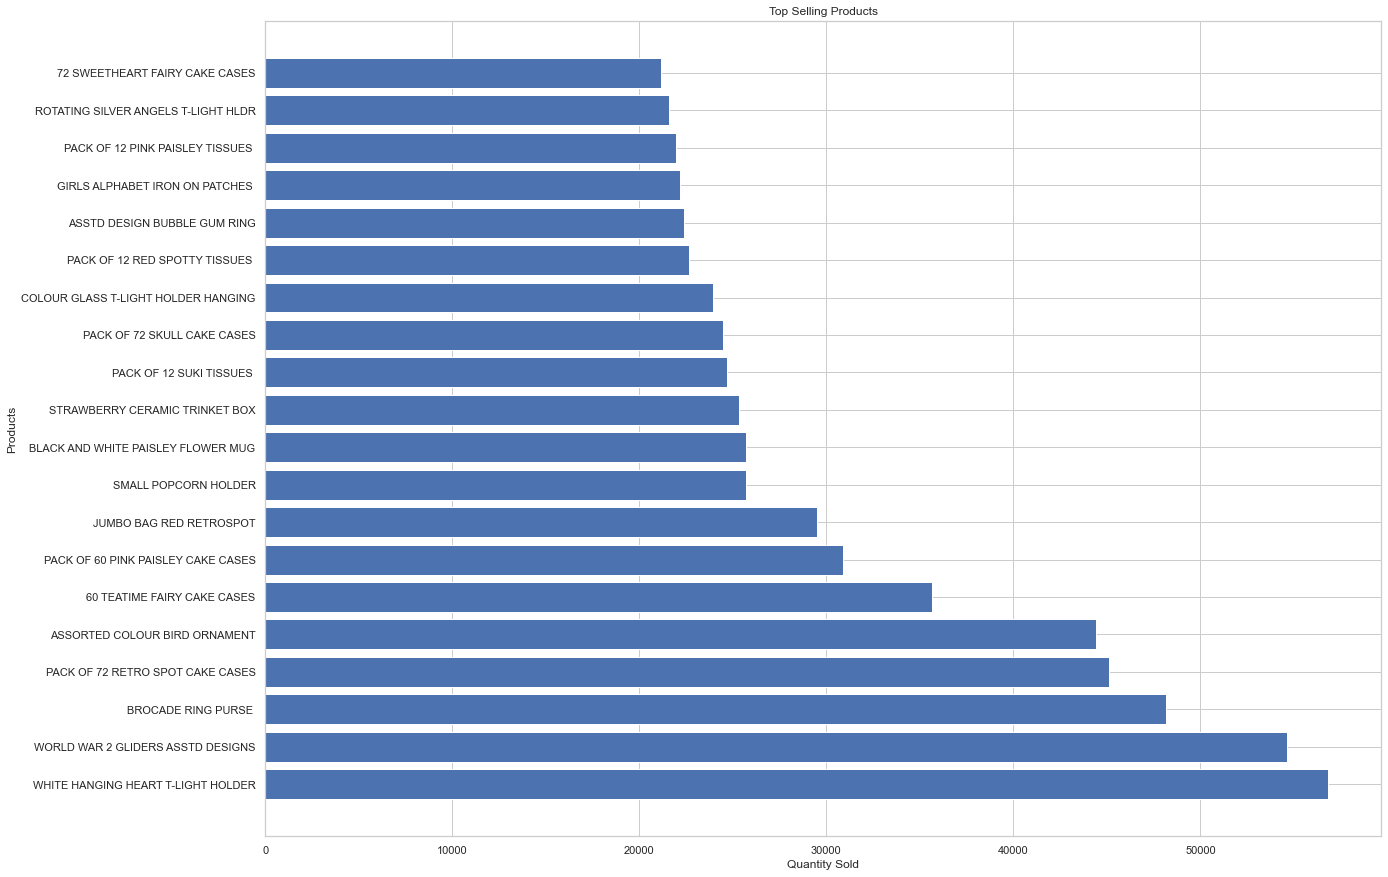

In [20]:
#We visualize the top 20 best selling products
products_sales=data.groupby('Description').agg({'Quantity':'sum', 'Amount':'sum' }).reset_index()
sorted_products=products_sales.sort_values(by='Quantity', ascending=False)
top_n=20
top_products = sorted_products.head(top_n)
plt.figure(figsize=(20,15))
plt.barh(data=top_products, width='Quantity', y='Description')
plt.title('Top Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Products')
plt.show()

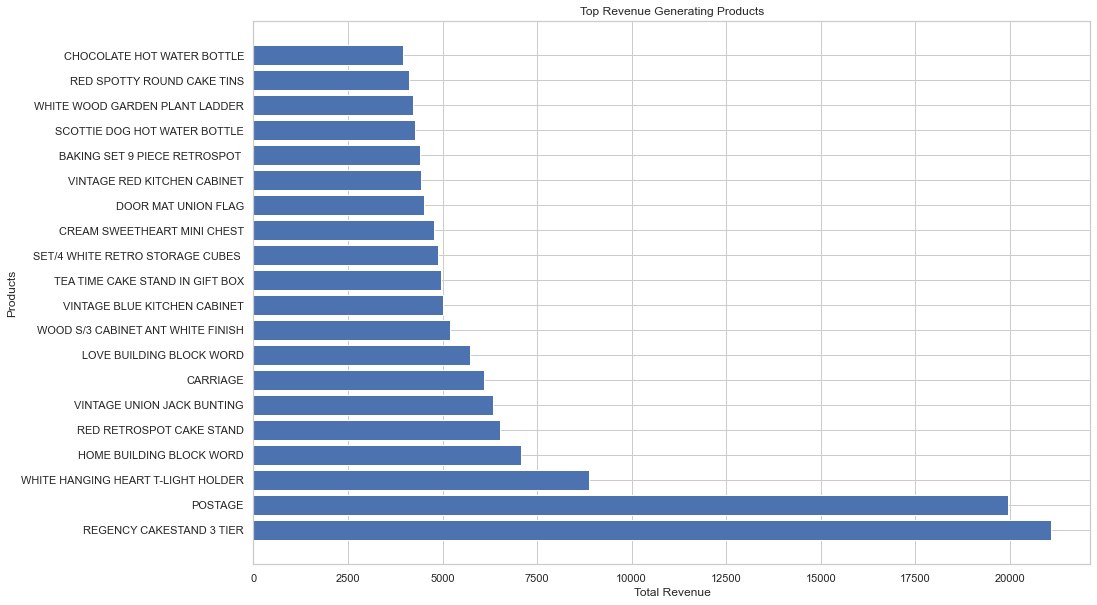

In [21]:
#We visualize the top 20 revenue genarating products
sorted_product_revenue=products_sales.sort_values(by='Amount', ascending=False)
top_n=20
top_products_revenue = sorted_product_revenue.head(top_n)
plt.figure(figsize=(15,10))
plt.barh(width='Amount', y='Description', data=top_products_revenue)
plt.title('Top Revenue Generating Products')
plt.xlabel('Total Revenue')
plt.ylabel('Products')
plt.show()

In [22]:
#We utilize maps to visualize revenue generation by country
top_locations=data.groupby('Country').agg({'Quantity':'sum', 'Amount':'sum'}).reset_index()
fig=px.choropleth(top_locations, 
                 locations="Country", locationmode="country names", color="Amount", hover_name="Country",
                 color_continuous_scale=px.colors.sequential.Plasma,
                 title="Revenue Generation by Country", projection="mollweide")
fig.show()

In [23]:
#We utilize maps to visualize sales by country
fig=px.choropleth(top_locations, 
                 locations='Country', locationmode='country names', color='Quantity', hover_name='Country',
                 color_continuous_scale=px.colors.sequential.Plasma,
                 title='Sales by Country', projection='mollweide')
fig.show()

#### Seasonality Analysis and Time Series Forcasting

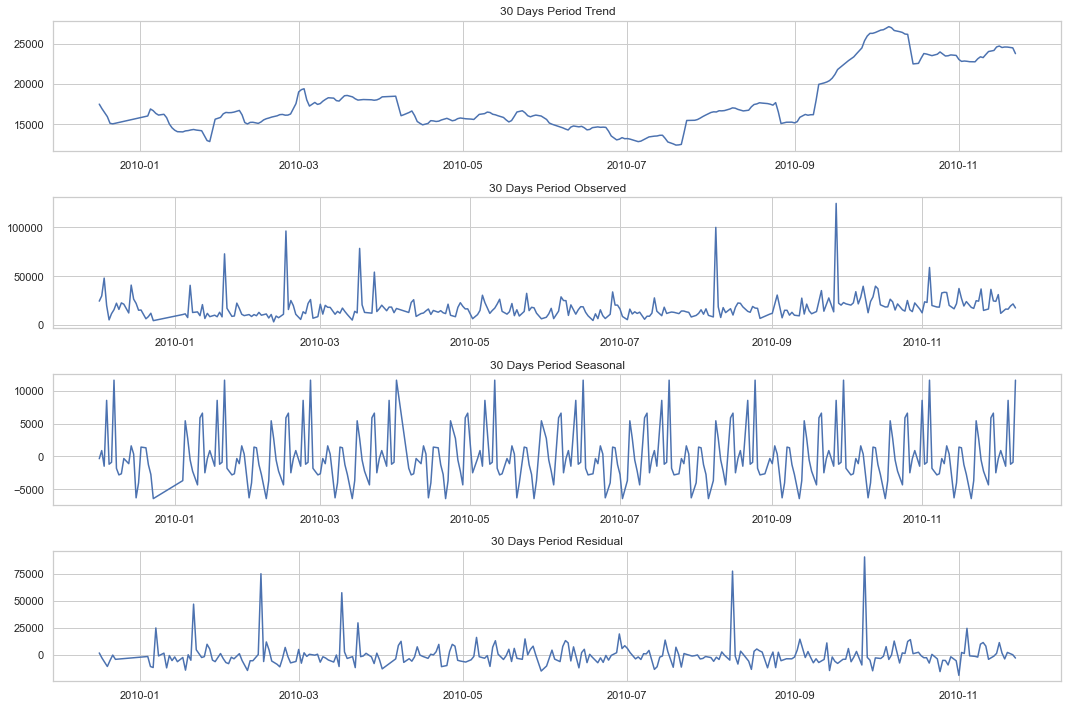

In [24]:
sales=data.groupby(by='InvoiceDate').agg({'Quantity':'sum'})

#we use decomposition from stats library to decompose the sales for a period of 30 days interval
decomposition = seasonal_decompose(sales['Quantity'], period=30)
print(decomposition)

#We visualize the trend, the observed, seasonal and residual for a 30 days period interval
plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(decomposition.trend)
plt.title('30 Days Period Trend')
plt.subplot(412)
plt.plot(decomposition.observed)
plt.title('30 Days Period Observed')
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('30 Days Period Seasonal')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('30 Days Period Residual')
plt.tight_layout()
plt.show()

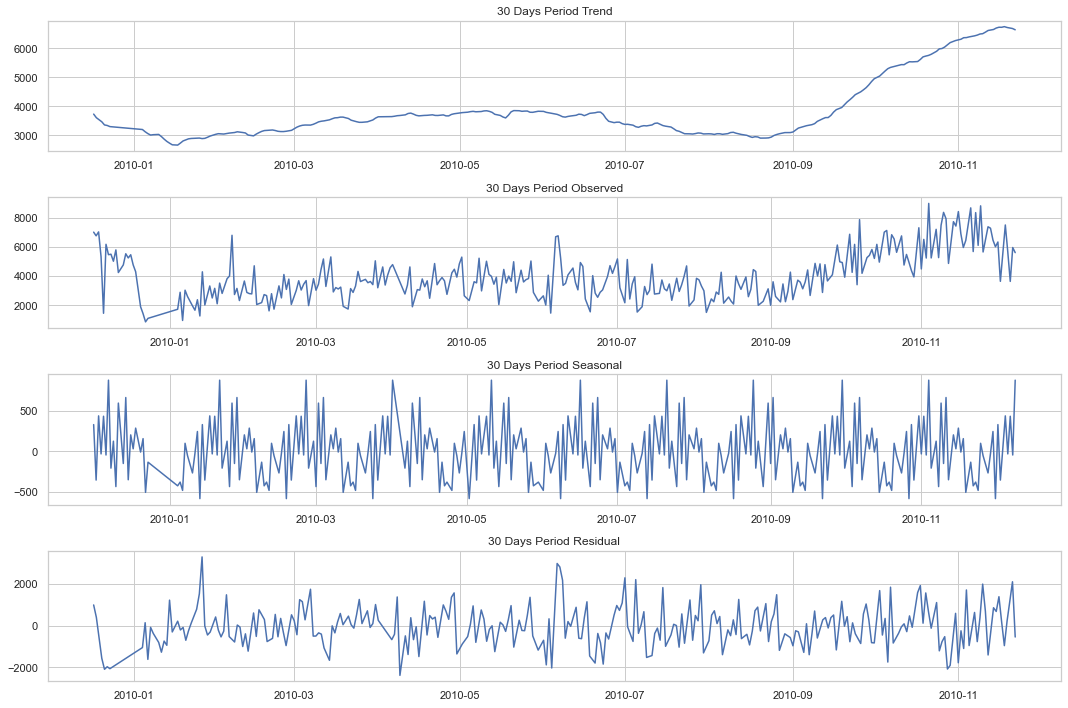

In [25]:
Revenue=data.groupby(by='InvoiceDate').agg({'Amount':'sum'})
#we use decomposition from stats library to decompose the sales for a period of 30 days interval
decomposition = seasonal_decompose(Revenue['Amount'], period=30)
#We visualize the trend, the observed, seasonal and residual for a 30 days period interval
plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(decomposition.trend)
plt.title('30 Days Period Trend')
plt.subplot(412)
plt.plot(decomposition.observed)
plt.title('30 Days Period Observed')
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('30 Days Period Seasonal')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('30 Days Period Residual')
plt.tight_layout()
plt.show()

#### PART THREE: CUSTOMER SEGMENTATION ANALYSIS

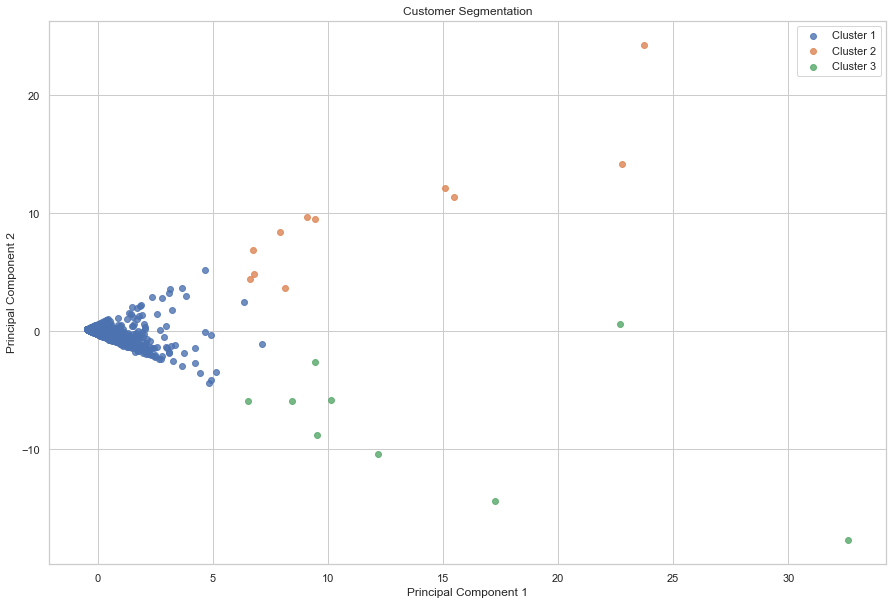

In [26]:
#We grouped customers based on customer id then compute the total amount and total quantity for each customer
customer_data=data.groupby('Customer ID').agg({'Amount':'sum', 'Quantity':'sum', 'Invoice':'nunique'}).reset_index()

#We used the scaler to standardize the values scale 
scaler= StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Amount', 'Quantity']])

#We specify the segmentation to be in 3 clusters and passed the data to the kmeans clustering algorithm
num_clusters = 3
kmeans= KMeans(n_clusters=num_clusters, random_state=0)
customer_data['cluster'] = kmeans.fit_predict(scaled_data)

#We use pca to reduce the dimentionality of the data into two dimentions
pca = PCA(n_components=2)
reduced_data=pca.fit_transform(scaled_data)

#We plot the reduced data as a scatter plot to visualize our clusters
plt.figure(figsize=(15,10))
for cluster in range(num_clusters):
    plt.scatter(reduced_data[customer_data['cluster']==cluster, 0],
               reduced_data[customer_data['cluster']==cluster, 1],
               label=f'Cluster {cluster + 1}', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

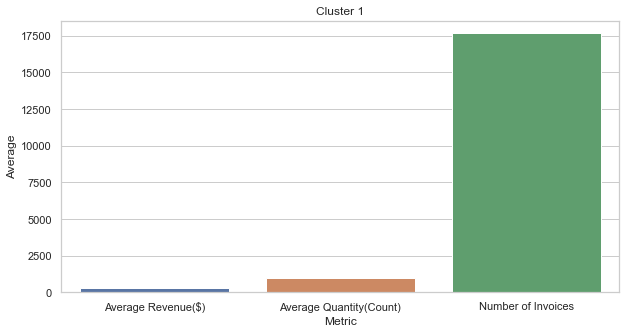

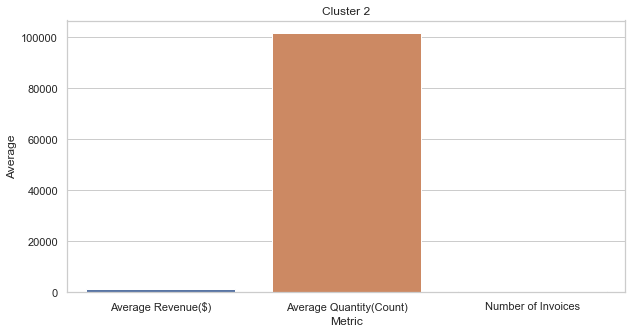

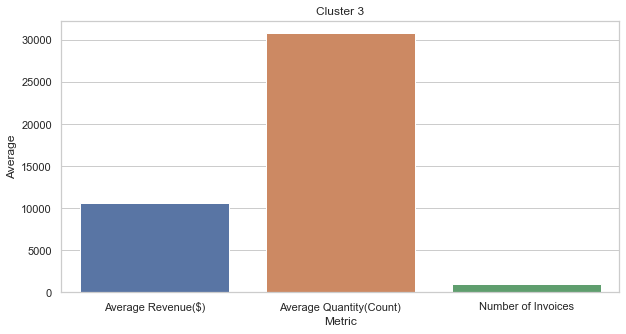

In [27]:
#For each cluster we visualize the average revenue genarated by each customer, the average quantity and the total number of invoices from the cluster
for cluster in range(num_clusters):
    cluster_data=customer_data[customer_data['cluster']==cluster]
    avg_amount=cluster_data['Amount'].mean()
    avg_quantity=cluster_data['Quantity'].mean()
    total_invoice=cluster_data['Invoice'].sum()
    plt.figure(figsize=(10,5))
    sns.barplot(x=['Average Revenue($)', 'Average Quantity(Count)', 'Number of Invoices'], y=[avg_amount, avg_quantity, total_invoice], data= cluster_data, ci=None)
    plt.title(f'Cluster {cluster + 1}')
    plt.ylabel('Average')
    plt.xlabel('Metric')
    plt.show()


Cluster 1 - The Frugal Shoppers:
   - This cluster represents the largest portion of our customer dataset.
   - Customers in this cluster tend to make a high number of purchases or invoices.
   - However, their individual average sales per transaction are relatively low.
   - Consequently, the revenue generated from this cluster is notably low, despite their frequent transactions.

Cluster 2 - The Selective Spenders:
   - The second-largest cluster in our dataset comprises customers falling into this category.
   - Customers in Cluster 2 exhibit a distinctive pattern of high average sales per transaction.
   - However, they make relatively few invoices or transactions, resulting in a low number of invoices.
   - The overall revenue generated from this cluster remains low due to their limited transaction frequency.

Cluster 3 - The High-Yield Investors:
   - This cluster consists of customers who generate higher average revenue per transaction.
   - Their average sales are decent and competitive.
   - However, they tend to make a lower number of invoices compared to other clusters.

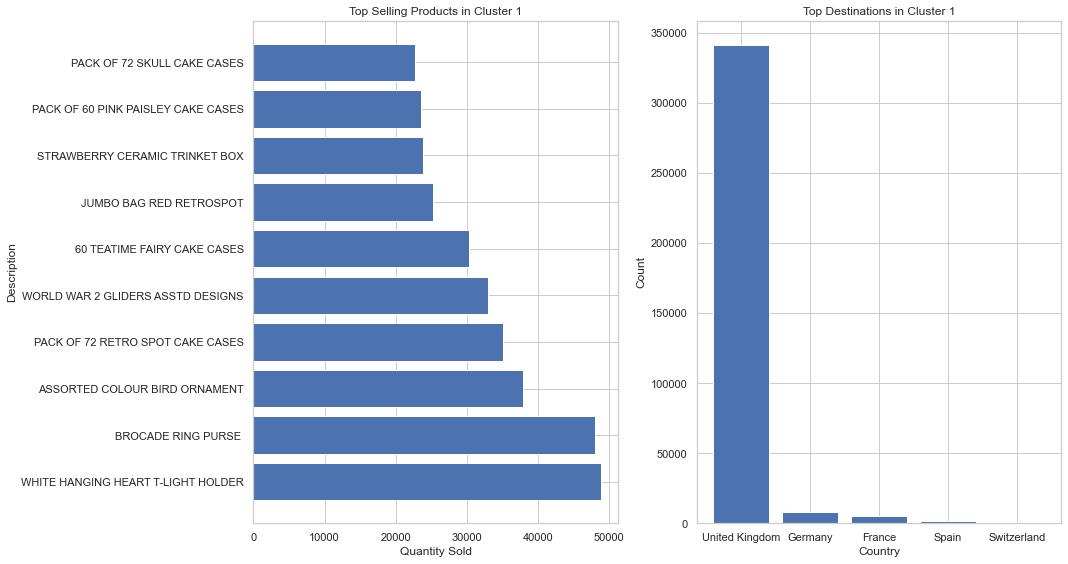

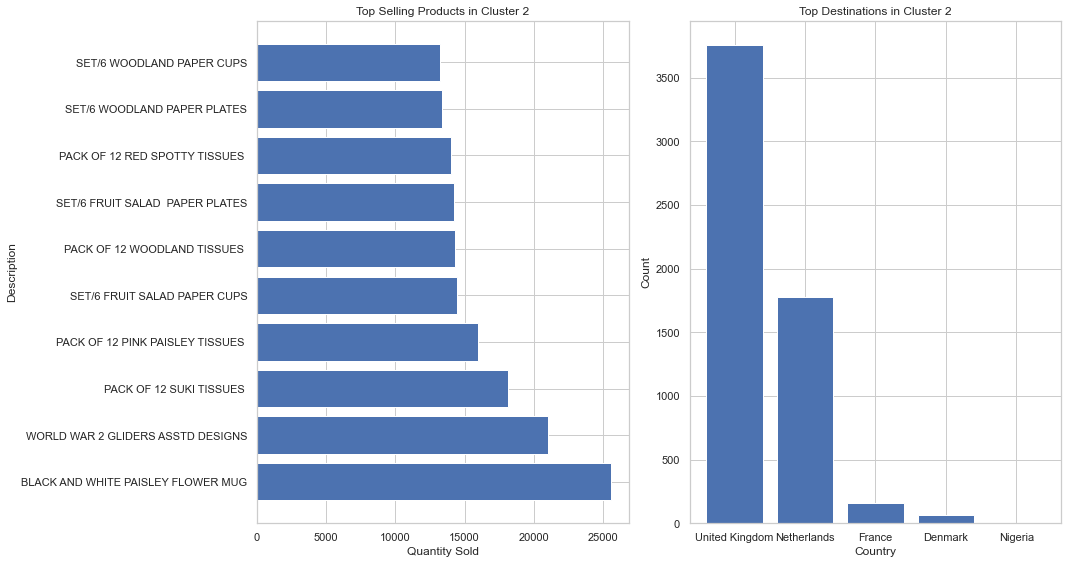

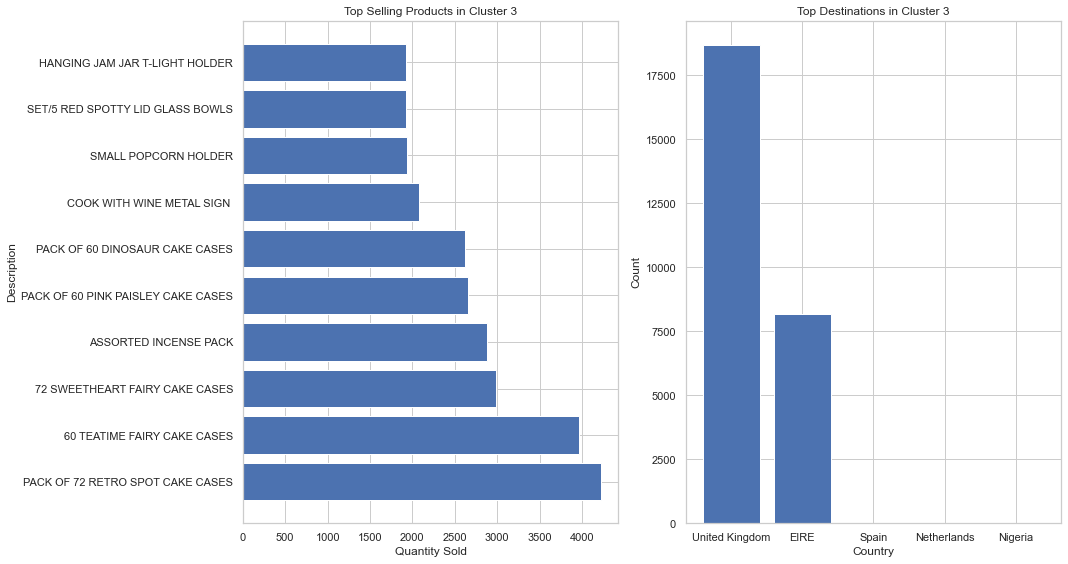

In [28]:
#For each cluster we visualize their top buying product and the country
for cluster in range(num_clusters):
    cluster_data=customer_data[customer_data['cluster']==cluster]
    top_products=data[data['Customer ID'].isin(cluster_data['Customer ID'])]
    top_products=top_products.groupby('Description')['Quantity'].sum().reset_index()
    top_products_10=top_products.sort_values(by='Quantity', ascending=False).head(10)
    top_countries=data[data['Customer ID'].isin(cluster_data['Customer ID'])]
    top_countries_5=top_countries['Country'].value_counts().head(5)
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(1,2,1)
    plt.barh(width='Quantity', y='Description', data=top_products_10)
    plt.title(f'Top Selling Products in Cluster {cluster + 1}')
    plt.xlabel('Quantity Sold')
    plt.ylabel('Description')
   
    plt.subplot(1,2,2)
    plt.bar(x=top_countries_5.index, height=top_countries_5.values)
    plt.title(f'Top Destinations in Cluster {cluster + 1}')
    plt.xlabel('Country')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

In Cluster 1, we observed a substantial presence of approximately 340,000 customers hailing from the United Kingdom, while Germany, France, Spain, and Switzerland combined accounted for fewer than 25,000 customers. This group of customers predominantly purchased the "White Hanging Heart T-Light Holder," nearing an impressive 50,000 units in sales. Additionally, they demonstrated notable interest in the "Brocade Ring Purse," just a few units shy of reaching the previous item's sales figures. Another popular choice among this cluster was the "Assorted Color Bird Ornament," with sales approaching the 40,000-unit mark.

Cluster 2, on the other hand, comprised a different customer demographic. It consisted of approximately 3,700 customers from the United Kingdom, around 1,700 from the Netherlands, and several hundred from France and Denmark. These customers displayed a strong preference for the "Black and White Paisley Flower Mug," which sold over 25,000 units. Furthermore, they exhibited substantial interest in the "World War 2 Gliders Asstd Designs," with sales exceeding 20,000 units, and the "Pack of 12 Suki Tissue," which saw more than 17,000 units sold.

In Cluster 3, there was a notable presence of around 18,000 customers from the United Kingdom and 8,000 from EIRE, with a smaller representation from Spain, the Netherlands, and Nigeria. This cluster displayed a penchant for items such as the "2 Retro Spot Cake Cases," which witnessed sales of over 4,000 units. Additionally, the "Teatime Fairy Cake Cases" came close to the 4,000-unit mark, while the "72 Sweetheart Fairy Cake Cases" fell just short of 3,000 units in sales.

#### PART FOUR: MARKET BASKET ANALYSIS

In [29]:
#We combine our clusters data and the original data to have a new dataframe that specifies each customers clusters
combined_data=pd.merge(customer_data, data, on='Customer ID', how='inner')

combined_data.head(10)

Customer ID  Amount_x  Quantity_x  Invoice_x  cluster Invoice_y StockCode  \
0       12346    206.36          70         11        0    491725   TEST001   
1       12346    206.36          70         11        0    491742   TEST001   
2       12346    206.36          70         11        0    491744   TEST001   
3       12346    206.36          70         11        0    492718   TEST001   
4       12346    206.36          70         11        0    492722   TEST002   
5       12346    206.36          70         11        0    493410   TEST001   
6       12346    206.36          70         11        0    493412   TEST001   
7       12346    206.36          70         11        0    494450   TEST001   
8       12346    206.36          70         11        0    495295   TEST001   
9       12346    206.36          70         11        0    499763     20682   

                  Description  Quantity_y InvoiceDate  Price         Country  \
0     This is a test product.          10  2009-12-14   4.50  United Kingdom   
1     This is a test product.           5  2009-12-14   4.50  United Kingdom   
2     This is a test product.           5  2009-12-14   4.50  United Kingdom   
3     This is a test product.           5  2009-12-18   4.50  United Kingdom   
4     This is a test product.           1  2009-12-18   1.00  United Kingdom   
5     This is a test product.           5  2010-01-04   4.50  United Kingdom   
6     This is a test product.           5  2010-01-04   4.50  United Kingdom   
7     This is a test product.           5  2010-01-14   4.50  United Kingdom   
8     This is a test product.           5  2010-01-22   4.50  United Kingdom   
9  RED SPOTTY CHILDS UMBRELLA           1  2010-03-02   3.25  United Kingdom   

   Amount_y  
0      4.50  
1      4.50  
2      4.50  
3      4.50  
4      1.00  
5      4.50  
6      4.50  
7      4.50  
8      4.50  
9      3.25

In [30]:
#We drop the columns we dont need and rename the columns approriately
combined_data.drop(columns=['Invoice_y','Price','Amount_y','Quantity_y','InvoiceDate'], inplace=True)

combined_data.rename(columns={'Amount_x':'Amount','Quantity_x':'Quantity','Invoice_x':'Invoice'}, inplace=True)

combined_data.head(5)

Customer ID  Amount  Quantity  Invoice  cluster StockCode  \
0       12346  206.36        70       11        0   TEST001   
1       12346  206.36        70       11        0   TEST001   
2       12346  206.36        70       11        0   TEST001   
3       12346  206.36        70       11        0   TEST001   
4       12346  206.36        70       11        0   TEST002   

               Description         Country  
0  This is a test product.  United Kingdom  
1  This is a test product.  United Kingdom  
2  This is a test product.  United Kingdom  
3  This is a test product.  United Kingdom  
4  This is a test product.  United Kingdom

In [31]:
clusters=combined_data['cluster'].unique()

#We segregate each cluster as a new dataframe to perform the analysis for each cluster
clusters_dataframe={}

for cluster in clusters:
    clusters_dataframe['cluster_{}df'.format(cluster)]=combined_data[combined_data['cluster'] == cluster]
cluster_0=clusters_dataframe['cluster_0df']
cluster_1=clusters_dataframe['cluster_1df']
cluster_2=clusters_dataframe['cluster_2df']

In [32]:
#to perform market basket analyisis we group our data by customer id and the description of the product
basket_1=cluster_1.groupby(['Customer ID', 'Description'])['Description'].nunique().unstack()

#we encode our data to binary to represent the presence of purchase or otherwise of a product by a customer
basket_1=basket_1.applymap(lambda x: 1 if x>0 else 0)

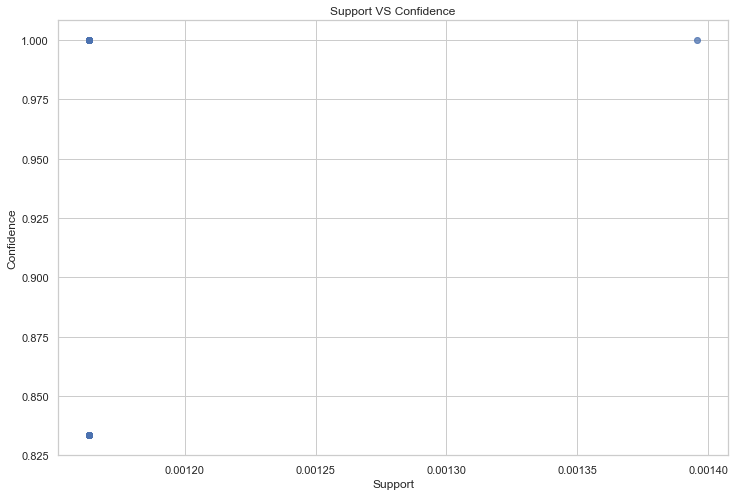

In [33]:
#we state the rules of the basket lift as the metric with minimum threshold of 1
frequent_itemsets= apriori(basket_1, min_support=0.001, use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift', min_threshold=1.0)
sorted_rules=rules.sort_values(by=['lift'], ascending=False)

#we visualize the support and confidence of this rule
plt.figure(figsize=(12,8))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support VS Confidence')
plt.show()

In [34]:
filtered_rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] >= 800)]
for index, row in filtered_rules.iterrows():
    antecedent = row['antecedents']
    consequent = row['consequents']
    
    # Check if antecedent appears as consequent in another row
    if filtered_rules[(filtered_rules['antecedents'] == consequent) & (filtered_rules['consequents'] == antecedent)].shape[0] > 0:
        # Swap antecedent and consequent
        filtered_rules.at[index, 'antecedents'] = consequent
        filtered_rules.at[index, 'consequents'] = antecedent
filtered_rules

antecedents  \
0                 (PACK OF 60 PINK PAISLEY CAKE CASES)   
1                 (PACK OF 60 PINK PAISLEY CAKE CASES)   
18                           (LUNCH BOX I LOVE LONDON)   
19                           (LUNCH BOX I LOVE LONDON)   
20                           (LUNCH BOX I LOVE LONDON)   
..                                                 ...   
252  (RED RETROSPOT CAKE STAND, LUNCH BOX I LOVE LO...   
253                  (PACK OF 72 RETROSPOT CAKE CASES)   
254                 (PACK OF 72 RETRO SPOT CAKE CASES)   
255                         (REGENCY CAKESTAND 3 TIER)   
257                          (LUNCH BOX I LOVE LONDON)   

                                           consequents  antecedent support  \
0                   ( SET 2 TEA TOWELS I LOVE LONDON )            0.001163   
1                   ( SET 2 TEA TOWELS I LOVE LONDON )            0.001163   
18                  (PACK OF 72 RETRO SPOT CAKE CASES)            0.001163   
19                  (PACK OF 72 RETRO SPOT CAKE CASES)            0.001163   
20                   (PACK OF 72 RETROSPOT CAKE CASES)            0.001163   
..                                                 ...                 ...   
252  (PACK OF 72 RETROSPOT CAKE CASES, PACK OF 72 R...            0.001163   
253  (LUNCH BOX I LOVE LONDON, RED RETROSPOT CAKE S...            0.001163   
254  (PACK OF 72 RETROSPOT CAKE CASES, RED RETROSPO...            0.001163   
255  (PACK OF 72 RETROSPOT CAKE CASES, RED RETROSPO...            0.001163   
257  (PACK OF 72 RETROSPOT CAKE CASES, RED RETROSPO...            0.001163   

     consequent support   support  confidence   lift  leverage  conviction  \
0              0.001163  0.001163         1.0  859.6  0.001162         inf   
1              0.001163  0.001163         1.0  859.6  0.001162         inf   
18             0.001163  0.001163         1.0  859.6  0.001162         inf   
19             0.001163  0.001163         1.0  859.6  0.001162         inf   
20             0.001163  0.001163         1.0  859.6  0.001162         inf   
..                  ...       ...         ...    ...       ...         ...   
252            0.001163  0.001163         1.0  859.6  0.001162         inf   
253            0.001163  0.001163         1.0  859.6  0.001162         inf   
254            0.001163  0.001163         1.0  859.6  0.001162         inf   
255            0.001163  0.001163         1.0  859.6  0.001162         inf   
257            0.001163  0.001163         1.0  859.6  0.001162         inf   

     zhangs_metric  
0              1.0  
1              1.0  
18             1.0  
19             1.0  
20             1.0  
..             ...  
252            1.0  
253            1.0  
254            1.0  
255            1.0  
257            1.0  

[168 rows x 10 columns]

In [35]:
filtered_rules.drop_duplicates(inplace=True)

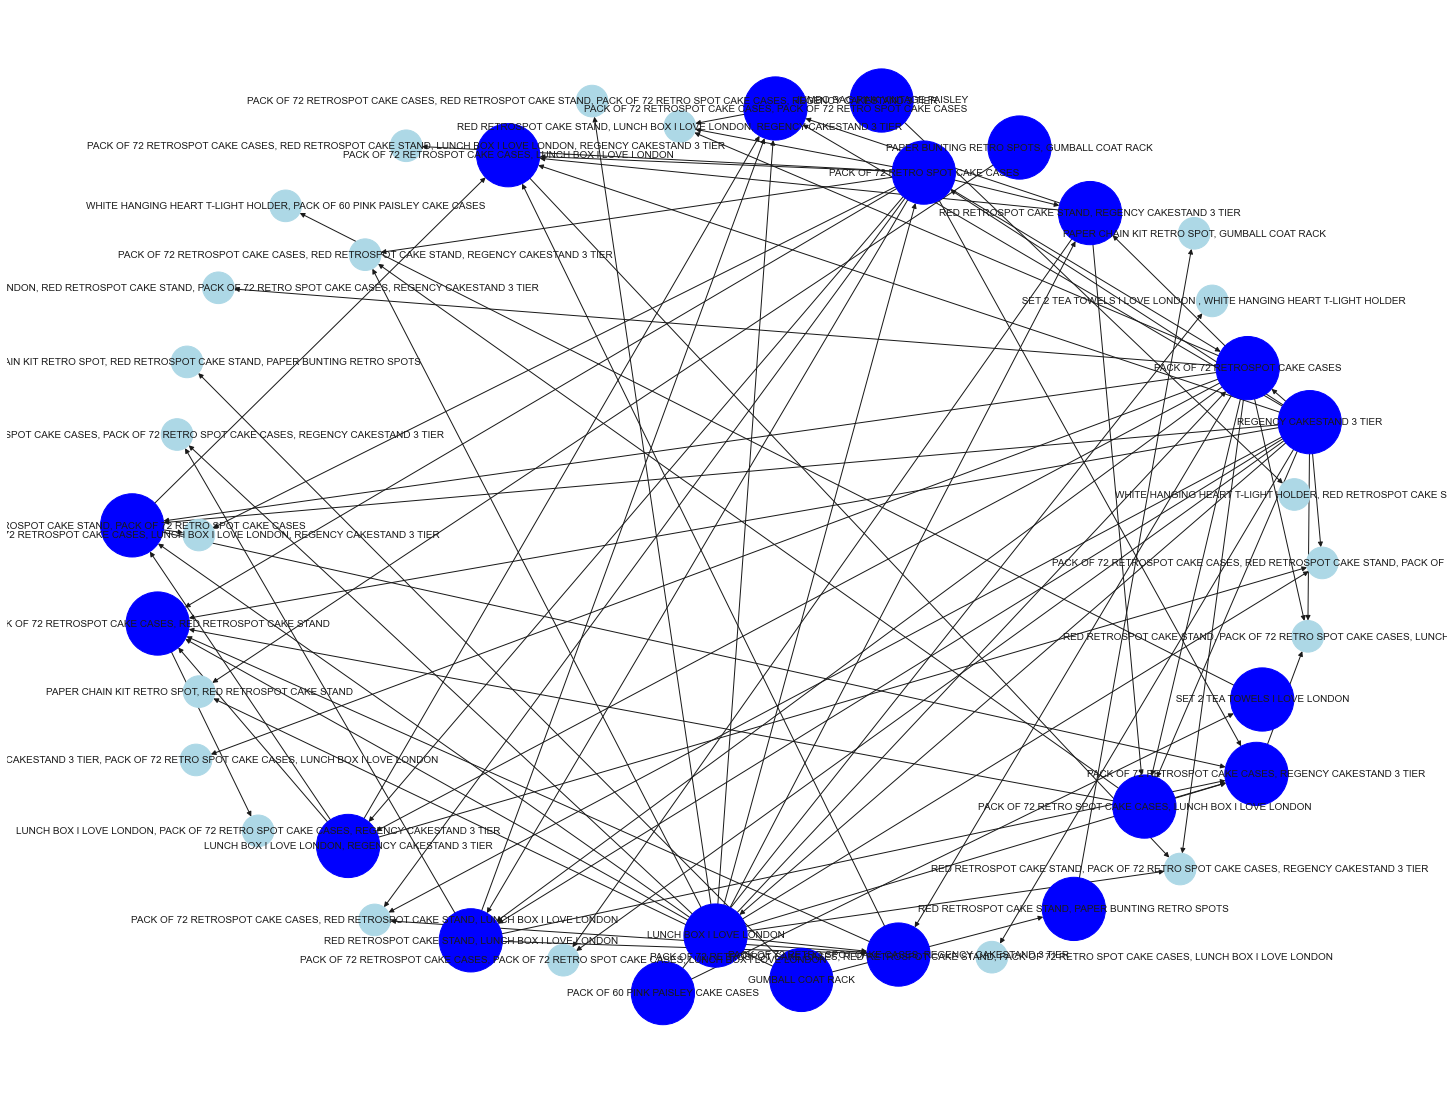

In [36]:
#We Create a directed graph
G = nx.DiGraph()

# Add nodes and edges while grouping antecedents and consequents
for idx, row in filtered_rules.iterrows():
    antecedents = ", ".join(row['antecedents'])
    consequents = ", ".join(row['consequents'])
    G.add_node(antecedents, color='blue', size=4000)
    G.add_node(consequents, color='lightblue', size=1000)
    G.add_edge(antecedents, consequents, weight=00.4, capacity=1)

# Define colors for nodes
node_colors = [G.nodes[n]['color'] for n in G.nodes]
node_size = [G.nodes[n]['size'] for n in G.nodes]
# Set node sizes and font size

font_size = 10

# Compute layout
pos = nx.spring_layout(G, seed=40, k=20)

# Draw the graph with truncated labels
plt.figure(figsize=(20, 15))
nx.draw(G, pos, with_labels=True, node_color=node_colors, font_size=font_size, node_size=node_size)

# Show the plot
plt.show()

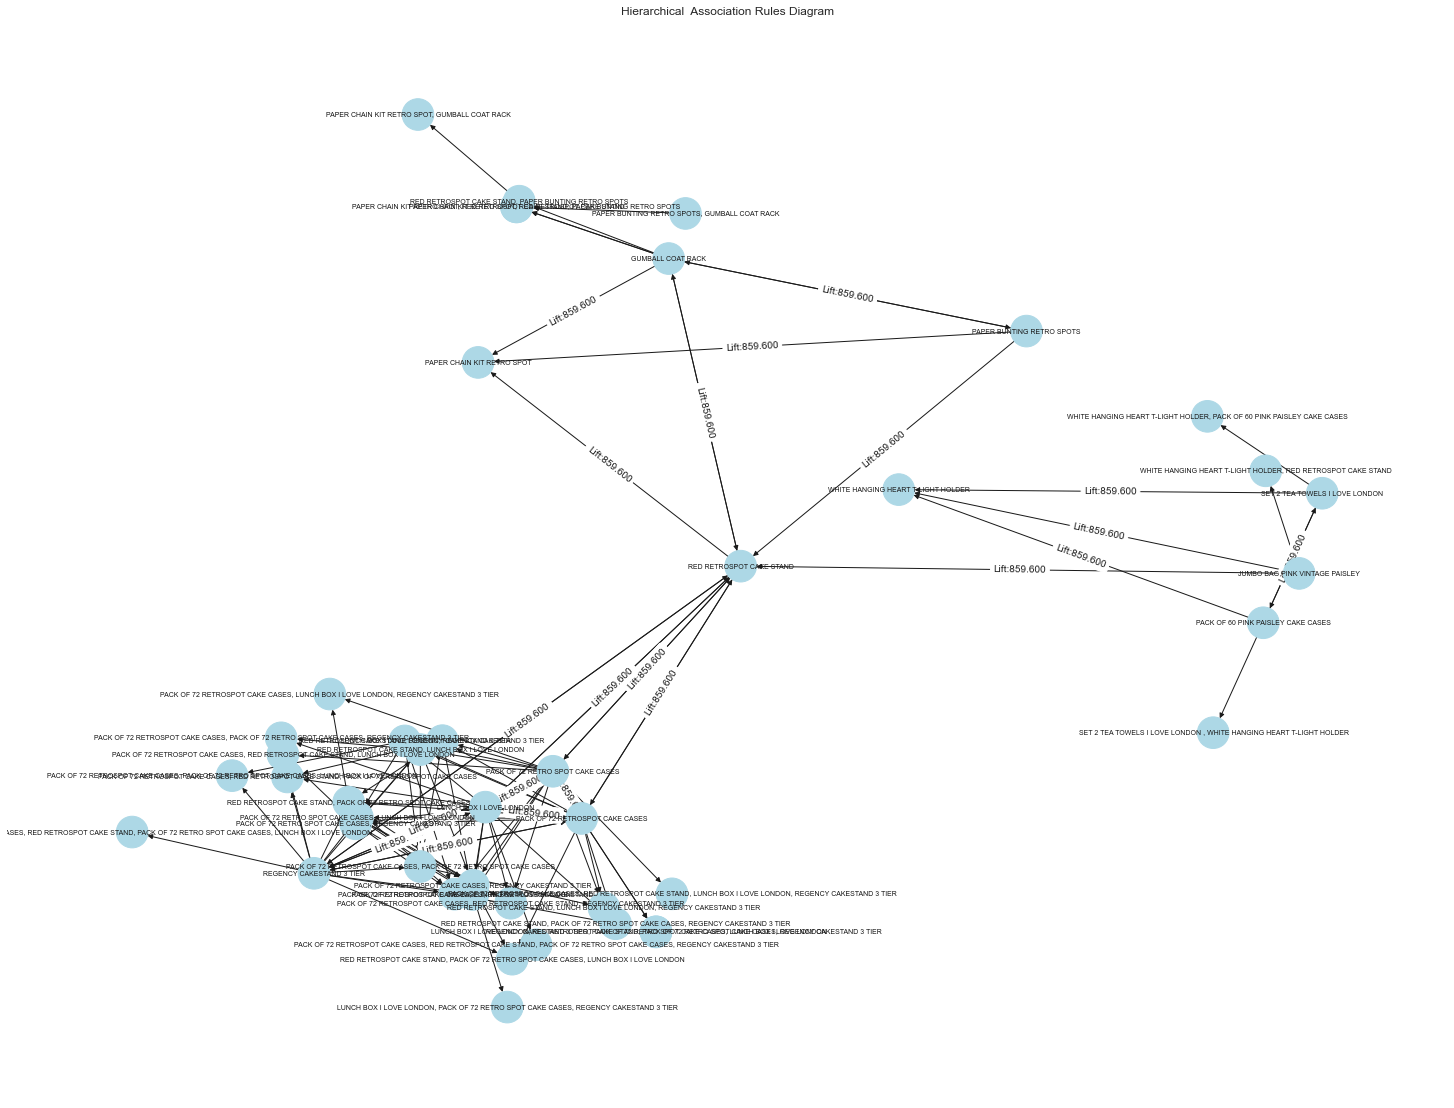

In [37]:
#We create a hierachichal structure to show the support and lift for each association
for index, row in filtered_rules.iterrows():
    antecedents=row['antecedents']
    consequents=row['consequents']
    support=row['support']
    lift=row['lift']
    for item in antecedents.union(consequents):
        G.add_node(item)
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, label=f"Lift:{lift:.3f}")

#we plot the hierachichal structure
plt.figure(figsize=(20,15))
edge_labels = nx.get_edge_attributes(G, 'label')
pos_hierarchy=nx.kamada_kawai_layout(G, scale=100)
node_colors = ['lightblue'] *len(G.nodes())
nx.draw(G, pos_hierarchy, with_labels=True, node_color=node_colors, node_size=1000, font_size=7)
nx.draw_networkx_edge_labels(G, pos_hierarchy, edge_labels=edge_labels)
plt.title("Hierarchical  Association Rules Diagram")
plt.show()

Market basket analysis was undertaken specifically for the second cluster, focusing on products that exhibited a substantial degree of lift—a statistical measure indicating the strength of association between items. What emerged from this analysis is a compelling revelation: the purchasing behavior observed within this cluster transcends mere coincidence. It underscores a pattern wherein products are not haphazardly selected but, rather, are systematically chosen by customers, and these selections tend to occur in tandem with a high degree of confidence and support.

Intriguingly, this cluster's shopping preferences unveiled a treasure trove of valuable insights. A notable number of products surfaced as strong candidates for recommendations to customers who frequently purchase items such as "Lunch box I Love London," "Retrospot Cake Stand," "Pack of 72 Retro Cake Stand Case," and "Regency Cake Stand 2 Tier." These products exhibited a propensity to co-occur with many other items in the basket, implying that customers who gravitate towards these choices tend to engage in complementary purchases. This suggests an opportunity to enhance customer experience by suggesting additional items that align with these popular choices, ultimately enriching their shopping journey.

### General Insights

### Recommendations